In [18]:
import os
unicode_to_class={}
class_to_unicode={}
# count=0
# IMG_DIR = '/Users/yichen/Documents/Cornell/06_2024sp/cs4701/code/data/ETL8'
# for dir in os.listdir(IMG_DIR):
#     if dir==".DS_Store":
#         continue
#     unicode_to_class[dir]=count
#     class_to_unicode[count]=dir
#     count+=1
unicodes=["3042", "3044", "3046", "3048", "304a", "304b", "304c", "304d", "304e", "304f", "3050", "3051", "3052", "3053", "3054", "3055", "3056", "3057", "3058", "3059", "305a", "305b", "305c", "305d", "305e", "305f", "3060", "3061", "3062", "3064", "3065", "3066", "3067", "3068", "3069", "306a", "306b", "306c", "306d", "306e", "306f", "3070", "3071", "3072", "3073", "3074", "3075", "3076", "3077", "3078", "3079", "307a", "307b", "307c", "307d", "307e", "307f", "3080", "3081", "3082", "3084", "3086", "3088", "3089", "308a", "308b", "308c", "308d", "308f", "3092", "3093"]
count=0
for u in unicodes:
    hex="0x"+u
    unicode_to_class[hex]=count
    class_to_unicode[count]=hex
    count+=1
print(class_to_unicode)

{0: '0x3042', 1: '0x3044', 2: '0x3046', 3: '0x3048', 4: '0x304a', 5: '0x304b', 6: '0x304c', 7: '0x304d', 8: '0x304e', 9: '0x304f', 10: '0x3050', 11: '0x3051', 12: '0x3052', 13: '0x3053', 14: '0x3054', 15: '0x3055', 16: '0x3056', 17: '0x3057', 18: '0x3058', 19: '0x3059', 20: '0x305a', 21: '0x305b', 22: '0x305c', 23: '0x305d', 24: '0x305e', 25: '0x305f', 26: '0x3060', 27: '0x3061', 28: '0x3062', 29: '0x3064', 30: '0x3065', 31: '0x3066', 32: '0x3067', 33: '0x3068', 34: '0x3069', 35: '0x306a', 36: '0x306b', 37: '0x306c', 38: '0x306d', 39: '0x306e', 40: '0x306f', 41: '0x3070', 42: '0x3071', 43: '0x3072', 44: '0x3073', 45: '0x3074', 46: '0x3075', 47: '0x3076', 48: '0x3077', 49: '0x3078', 50: '0x3079', 51: '0x307a', 52: '0x307b', 53: '0x307c', 54: '0x307d', 55: '0x307e', 56: '0x307f', 57: '0x3080', 58: '0x3081', 59: '0x3082', 60: '0x3084', 61: '0x3086', 62: '0x3088', 63: '0x3089', 64: '0x308a', 65: '0x308b', 66: '0x308c', 67: '0x308d', 68: '0x308f', 69: '0x3092', 70: '0x3093'}


In [30]:
import pandas as pd 
import numpy as np
import cv2
import os

IMG_DIR = '/data' #need to modify this
label_array=[]

for dataset in os.listdir(IMG_DIR):
    if dataset !="ETL8" and dataset !="ETL9":
        continue
    
    for unicode in os.listdir(os.path.join(IMG_DIR,dataset)):
        if unicode ==".DS_Store":
            continue
        print(dataset,unicode,unicode_to_class[unicode])
        
        for img in os.listdir(os.path.join(IMG_DIR,dataset,unicode)):
            if img[-4:]!=".png":
                continue
            img_array = cv2.imread(os.path.join(IMG_DIR,dataset,unicode,img), cv2.IMREAD_GRAYSCALE)
            if dataset=="ETL9":
                img_array=img_array[10:118, 10:117]
            img_array = cv2.resize(img_array, (48, 48))
            img_array = (img_array.flatten())
            img_array  = img_array.reshape(-1, 1).T
            
            with open('images.csv', 'ab') as f:
                np.savetxt(f, img_array, delimiter=",")
            
            label_array.append(unicode_to_class[unicode])
        
df = pd.DataFrame([*zip(label_array)])
df.to_csv('labels.csv', index=False)  

ETL8 0x305a 20
ETL8 0x305f 25
ETL8 0x3056 16
ETL8 0x3069 34
ETL8 0x3051 11
ETL8 0x3067 32
ETL8 0x3093 70
ETL8 0x3058 18
ETL8 0x3060 26
ETL8 0x306f 40
ETL8 0x306a 35
ETL8 0x3061 27
ETL8 0x3092 69
ETL8 0x3066 31
ETL8 0x3059 19
ETL8 0x3050 10
ETL8 0x3057 17
ETL8 0x3068 33
ETL8 0x3075 46
ETL8 0x3081 58
ETL8 0x3086 61
ETL8 0x3072 43
ETL8 0x3044 1
ETL8 0x3088 62
ETL8 0x307b 52
ETL8 0x308f 68
ETL8 0x308a 64
ETL8 0x307e 55
ETL8 0x304c 6
ETL8 0x304d 7
ETL8 0x3089 63
ETL8 0x3042 0
ETL8 0x3073 44
ETL8 0x3080 57
ETL8 0x3074 45
ETL8 0x304e 8
ETL8 0x304b 5
ETL8 0x307d 54
ETL8 0x307c 53
ETL8 0x3052 12
ETL8 0x3055 15
ETL8 0x3064 29
ETL8 0x305e 24
ETL8 0x305b 21
ETL8 0x306d 38
ETL8 0x306c 37
ETL8 0x3065 30
ETL8 0x3062 28
ETL8 0x3054 14
ETL8 0x3053 13
ETL8 0x306b 36
ETL8 0x306e 39
ETL8 0x305c 22
ETL8 0x305d 23
ETL8 0x308b 65
ETL8 0x307f 56
ETL8 0x307a 51
ETL8 0x3071 42
ETL8 0x3076 47
ETL8 0x3082 59
ETL8 0x3078 49
ETL8 0x304a 4
ETL8 0x304f 9
ETL8 0x308d 67
ETL8 0x308c 66
ETL8 0x3079 50
ETL8 0x3046 2
ETL8

In [31]:
import pandas as pd
images = pd.read_csv("images.csv",header=None)

In [32]:
images

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25626,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
25627,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
25628,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
25629,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [33]:
labels = pd.read_csv("labels.csv")
labels

,0
0,20
1,20
2,20
3,20
4,20
...,...
25626,60
25627,60
25628,60
25629,60


In [34]:
# import skimage.transform
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1
images=images.values/255

labels=labels.values.reshape(labels.shape[0])
images_train, images_val, labels_train, labels_val = train_test_split(
    images, labels, test_size=0.2)

# # Produces test split.
# images_remaining, images_test, labels_remaining, label_test = train_test_split(
#     images, labels, test_size=ratio_test)

# # Adjusts val ratio, w.r.t. remaining dataset.
# ratio_remaining = 1 - ratio_test
# ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
# images_train, images_val, labels_train, labels_val = train_test_split(
#     images_remaining, labels_remaining, test_size=ratio_val_adjusted)

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [37]:
print(images_train.shape)
print(labels_train.shape)

(20504, 2304)
(20504,)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


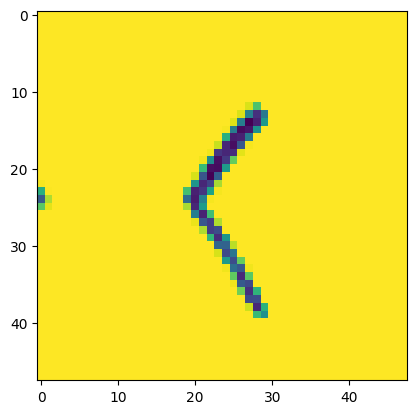

9
0x304f


In [38]:
import matplotlib.pyplot as plt
a=images_train[0]
a=images_train[0].reshape(48,48)
print(a)
plt.imshow(a)
plt.show()
print(labels_train[0])
print(class_to_unicode[labels_train[0]])

In [39]:
# reshape images
if K.image_data_format() == "channels_first":
  images_train = images_train.reshape(images_train.shape[0], 1,48,48)
  images_val = images_val.reshape(images_val.shape[0], 1,48,48)
  shape = (1,48,48)
else:
  images_train = images_train.reshape(images_train.shape[0], 48, 48, 1)
  images_val = images_val.reshape(images_val.shape[0], 48, 48, 1)
  shape = (48,48,1)
print(K.image_data_format())
print(shape)

channels_last
(48, 48, 1)


In [41]:
from keras.callbacks import TensorBoard
# the model
datagen = ImageDataGenerator(rotation_range=15,zoom_range=0.2)
datagen.fit(images_train)
model = keras.Sequential([
  keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=shape),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(32, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Conv2D(64, (3,3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Flatten(),
  # keras.layers.Dropout(0.5),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(71, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.fit(datagen.flow(images_train,labels_train,shuffle=True),epochs=30,batch_size=16,\
                    validation_data=(images_val,labels_val), \
                    callbacks = [keras.callbacks.EarlyStopping(patience=8,verbose=1,restore_best_weights=True), \
                                 keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=3,verbose=1)])
tensorboard= TensorBoard(log_dir="logs")
model.save("hiragana-model.h5") 

Epoch 1/30
641/641 [==============================] - 15s 23ms/step - loss: 3.0089 - accuracy: 0.2510 - val_loss: 1.0688 - val_accuracy: 0.6676 - lr: 0.0010
Epoch 2/30
641/641 [==============================] - 15s 23ms/step - loss: 0.8781 - accuracy: 0.7285 - val_loss: 0.4680 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 3/30
641/641 [==============================] - 15s 23ms/step - loss: 0.4995 - accuracy: 0.8397 - val_loss: 0.3508 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 4/30
641/641 [==============================] - 15s 23ms/step - loss: 0.3605 - accuracy: 0.8849 - val_loss: 0.2014 - val_accuracy: 0.9341 - lr: 0.0010
Epoch 5/30
641/641 [==============================] - 15s 23ms/step - loss: 0.2793 - accuracy: 0.9094 - val_loss: 0.2284 - val_accuracy: 0.9296 - lr: 0.0010
Epoch 6/30
641/641 [==============================] - 16s 25ms/step - loss: 0.2290 - accuracy: 0.9251 - val_loss: 0.1813 - val_accuracy: 0.9436 - lr: 0.0010
Epoch 7/30
641/641 [==============================] - 16s 

/Users/yichen/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
